     pcost       dcost       gap    pres   dres
 0: -7.6444e-01 -1.9378e+00  1e+00  2e-16  2e+00
 1: -9.1982e-01 -1.0024e+00  8e-02  4e-16  3e-01
 2: -9.9717e-01 -1.0105e+00  1e-02  2e-16  2e-16
 3: -9.9957e-01 -1.0005e+00  1e-03  2e-16  5e-16
 4: -9.9994e-01 -1.0001e+00  1e-04  3e-18  7e-16
 5: -9.9999e-01 -1.0000e+00  2e-05  3e-16  5e-16
 6: -1.0000e+00 -1.0000e+00  3e-06  2e-16  7e-16
 7: -1.0000e+00 -1.0000e+00  4e-07  2e-16  4e-16
 8: -1.0000e+00 -1.0000e+00  5e-08  2e-16  4e-16
 9: -1.0000e+00 -1.0000e+00  8e-09  2e-16  5e-16
10: -1.0000e+00 -1.0000e+00  1e-09  2e-16  3e-16
11: -1.0000e+00 -1.0000e+00  2e-10  0e+00  3e-16
12: -1.0000e+00 -1.0000e+00  2e-11  2e-16  6e-16
Optimal solution found.

lambda = [0. 1. 1.]
w = [1. 1.]
b = -3.0


ValueError: operands could not be broadcast together with shapes (2,100) (2,) 

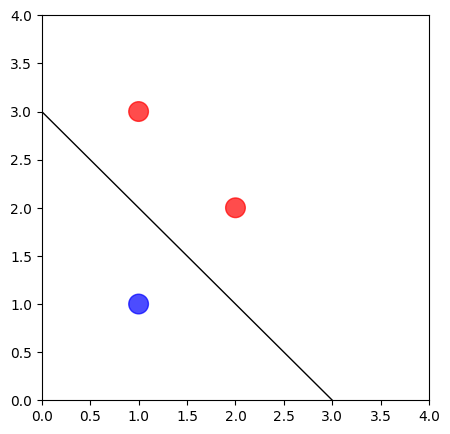

In [2]:
from cvxopt import matrix as matrix
from cvxopt import solvers as solvers
import numpy as np
import matplotlib.pyplot as plt

# 3 data points
x = np.array([[1., 3.], [2., 2.], [1., 1.]])
y = np.array([[1.], [1.], [-1.]])

# ---- Calculate lambda using cvxopt ----

# Calculate H matrix (H = y_i y_j (x_i · x_j))
H = np.dot(y, y.T) * np.dot(x, x.T)

# Construct the matrices required for QP in standard form
n = x.shape[0]
P = matrix(H)
q = matrix(-np.ones((n, 1)))
G = matrix(-np.eye(n))
h = matrix(np.zeros(n))
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros(1))

# Solver parameters
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-10
solvers.options['feastol'] = 1e-10

# Perform QP
sol = solvers.qp(P, q, G, h, A, b)

# The solution of the QP, λ
lamb = np.array(sol['x'])

# ---------------------------------------------------------------

# Calculate w using the lambda, which is the solution to QP
w = np.sum(lamb * y * x, axis=0)

# Find support vectors
sv_idx = np.where(lamb > 1e-5)[0]
sv_lamb = lamb[sv_idx]
sv_x = x[sv_idx]
sv_y = y[sv_idx]

# Calculate b using the support vectors
b = sv_y[0] - np.dot(w, sv_x[0])
# Alternatively, you can average b from all support vectors
b = np.mean(sv_y - np.dot(sv_x, w))

# With w and b, we can determine the Separating Hyperplane

print('\nlambda =', np.round(lamb.flatten(), 3))
print('w =', np.round(w, 3))
print('b =', np.round(b, 3))

# Visualize the data points
plt.figure(figsize=(5, 5))
color = ['red' if a == 1 else 'blue' for a in y]
plt.scatter(x[:, 0], x[:, 1], s=200, c=color, alpha=0.7)
plt.xlim(0, 4)
plt.ylim(0, 4)

# Visualize the decision boundary
x1_dec = np.linspace(0, 4, 100)
x2_dec = -(w[0] * x1_dec + b) / w[1]
plt.plot(x1_dec, x2_dec, c='black', lw=1.0, label='decision boundary')

# Visualize the positive & negative boundary
w_norm = np.sqrt(np.sum(w ** 2))
w_unit = w / w_norm
half_margin = 1 / w_norm
upper = np.array([x1_dec, x2_dec]) + half_margin * w_unit
lower = np.array([x1_dec, x2_dec]) - half_margin * w_unit

plt.plot(upper[0], upper[1], '--', lw=1.0, label='positive boundary')
plt.plot(lower[0], lower[1], '--', lw=1.0, label='negative boundary')

# Highlight the support vectors
plt.scatter(sv_x[:, 0], sv_x[:, 1], s=50, marker='o', c='white')

for s, (x1, x2) in zip(lamb, x):
    plt.annotate('λ=' + str(s[0].round(2)), (x1 - 0.05, x2 + 0.2))

plt.legend()
plt.show()

print("\nMargin = {:.4f}".format(half_margin * 2))
